In [65]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from underthesea import word_tokenize

# Build datatable

In [52]:
file_vi = open('./data/train.vi', 'r')
lines_vi = file_vi.readlines()
file_vi = open('./data/tst2012.vi', 'r')
lines_vi.extend(file_vi.readlines())
file_vi = open('./data/tst2013.vi', 'r')
lines_vi.extend(file_vi.readlines())

In [53]:
file_en = open('./data/train.en', 'r')
lines_en = file_en.readlines()
file_en = open('./data/tst2012.en', 'r')
lines_en.extend(file_en.readlines())
file_en = open('./data/tst2013.en', 'r')
lines_en.extend(file_en.readlines())

In [55]:
nltk.download('stopwords')
stop_words_en = set(stopwords.words('english'))
stop_words_vi = open('./data/stopwords.vi', 'r').read().split('\n')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/avocado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
df = pd.DataFrame({'vi': lines_vi, 'en': lines_en})

# Explore

In [57]:
vi = np.array(df['vi'].apply(lambda x: len(x.split(' '))))
en = np.array(df['en'].apply(lambda x: len(x.split(' '))))

In [59]:
MAX_LEN = np.percentile(vi, 99.9)

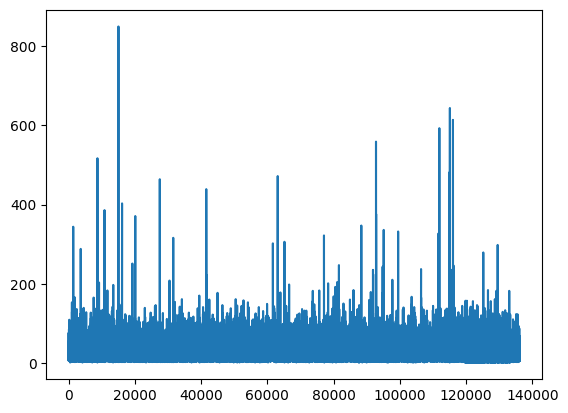

In [60]:
plt.plot(vi)

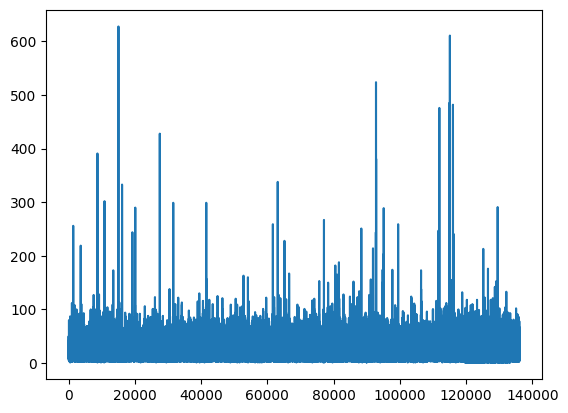

In [61]:
plt.plot(en)

# Pre process

In [62]:
def pre_process(df):
    df = df.dropna() # drop nan
    df = df.drop_duplicates() # drop duplicate
    df = df.sample(frac = 1) # shuffle
    # remove special characters, lower case, tokenize words
    df['vi'] = df['vi'].apply(lambda x: word_tokenize(''.join(e for e in str(x).lower() if e.isalnum() or e == ' '), format='text'))
    df['en'] = df['en'].apply(lambda x: ''.join(e for e in str(x).lower() if e.isalnum() or e == ' '))
    # remove stop words
    df['vi'] = df['vi'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words_vi]))
    df['en'] = df['en'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words_en]))
    # stemming for english
    stemmer = PorterStemmer()
    df['vi'] = df['vi'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
    return df

In [63]:
df = pre_process(df)
df

,vi,en
68736,tế_bào tự_động phát_hiện di_chuyển chú_ý,cells detect change move attention
127466,trung_tâm dữ_liệu có_lẽ 2 thông_tin,data centers might get two pieces information
19421,công_nghệ giải_trí thiết_kế nhẹ,also know technology entertainment design used...
67027,thắc_mắc khác_biệt phụ_nữ đàn_ông mặt sinh_lý_học,ask big difference women men physiologically
124310,khu rừng khu rừng thông_thường gấp 10 dày gấp ...,forests compared conventional plantation grow ...
...,...,...
121264,phòng chương_trình ti vi kì_cục âm_nhạc thiên_...,allowed part people aposs living room strange ...
61752,tiểu_hành tình nằm quỹ_đạo trái_đất quỹ_đạo mộ...,fairly substantial number asteroids orbit eart...
106921,công_nghệ,like technology right
33669,rõ_ràng nhà_báo kỹ_thuật học ngắn_gọn khắc_họa...,clear aposm journalist technologist aposd like...


# Train